# Project submission: Time Series Model
## Student: Ginju Soumya

Dataset Link
https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view
(https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view)


Hint:
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import
autocorrelation_plot from
statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr plt.style.use('fivethirtyeight')
%matplotlib inline



Problem Statement:
    
Pick up the following stocks and generate forecasts accordingly
Stocks:
    
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline
import datetime as dt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [156]:
df = pd.read_csv('data_stocks.csv')

In [157]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [158]:
df.isnull().values.any()

False

NASDAQ.AAPL

In [159]:
df1 = df.copy()

In [160]:
df1["AAPL_LOG"] = df1["NASDAQ.AAPL"].apply(lambda x:np.log(x))

In [161]:
df1.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,AAPL_LOG
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449


In [162]:
df1["DATE_NEW"] = df1["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

In [163]:
df1.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,AAPL_LOG,DATE_NEW
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,2017-04-03 21:30:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,2017-04-03 21:31:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,2017-04-03 21:32:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,2017-04-03 21:33:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,2017-04-03 21:34:00


In [164]:
print("Durbin-Watson statistic:",sm.stats.durbin_watson(df1["AAPL_LOG"]))

Durbin-Watson statistic: 1.5195875753588083e-08


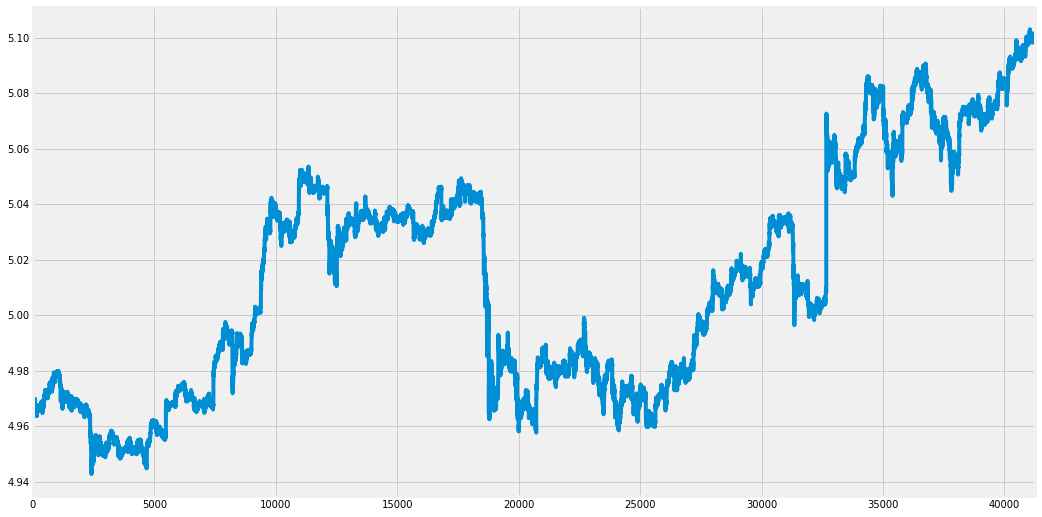

In [165]:
#visualising
df1["AAPL_LOG"].plot(figsize=(16,9))
plt.show()

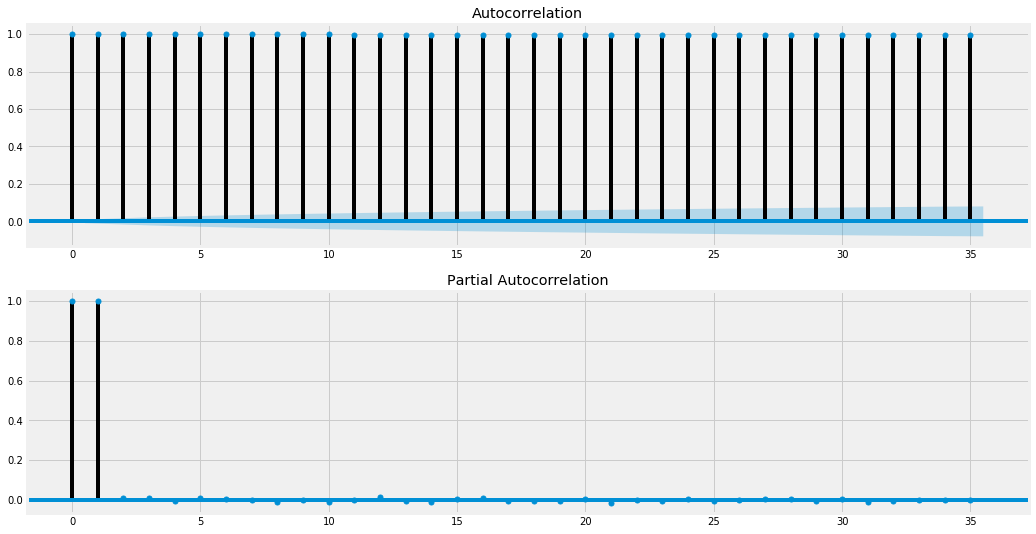

In [166]:
#auto correlation
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1["AAPL_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1["AAPL_LOG"], lags=35, ax=ax2)

In [167]:
# converting 'AAPL_LOG' column to as array and dropping all NaNs
array1 = (df1["AAPL_LOG"].dropna().as_matrix())

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [168]:
#creating column 'AAPL_LOG_DIFF'
df1["AAPL_LOG_DIFF"] = df1["AAPL_LOG"] - df1["AAPL_LOG"].shift(periods=-1)

In [169]:
#ARMA Model
model1 = sm.tsa.ARMA(array1,(2,0)).fit()
#Prints model parameter
print(model1.params)

[5.02083864 0.99073765 0.00918435]


In [170]:
print(model1.aic, model1.bic, model1.hqic)

-492715.6402173121 -492681.1290405307 -492704.7324360055


In [171]:
aic=999999
a,b,c = 0,0,0

for p in range(3):
    for q in range(1,3):
        for r in range(3):
            try:
                model= ARIMA(array1,(p,q,r)).fit()
                if(aic > model1.aic):
                    aic = model1.aic
                    a,b,c = p,q,r
            except:
                pass 
            
print(a,b,c)

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\mode

0 1 0


C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [172]:
#ARIMA model fitting
model1_arima = ARIMA(array1,(0, 1, 0)).fit()

In [173]:
print("Durbin-Watson statistic:",sm.stats.durbin_watson(model1_arima.resid))

Durbin-Watson statistic: 2.018496253744051


In [174]:
#ARIMA Model value predicting
pred1 = model1_arima.predict()
pred1

array([3.20258534e-06, 3.20258534e-06, 3.20258534e-06, ...,
       3.20258534e-06, 3.20258534e-06, 3.20258534e-06])

In [175]:
print("RMSE for Model1=",np.sqrt(mean_squared_error(pred1,df1["AAPL_LOG_DIFF"][:-1])))

RMSE for Model1= 0.0006179891020819413


NASDAQ.ADP

In [176]:
df2 = df.copy()

In [177]:
df2["ADP_LOG"] = df2["NASDAQ.ADP"].apply(lambda x:np.log(x))

In [178]:
df2.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,ADP_LOG
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.627225
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.626344
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.627054
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.626344
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.625561


In [179]:
df2["DATE_NEW"] = df2["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

In [180]:
df2.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,ADP_LOG,DATE_NEW
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.627225,2017-04-03 21:30:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.626344,2017-04-03 21:31:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.627054,2017-04-03 21:32:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.626344,2017-04-03 21:33:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.625561,2017-04-03 21:34:00


In [181]:
print("Durbin-Watson statistic:",sm.stats.durbin_watson(df2["ADP_LOG"]))

Durbin-Watson statistic: 2.270798861744159e-08


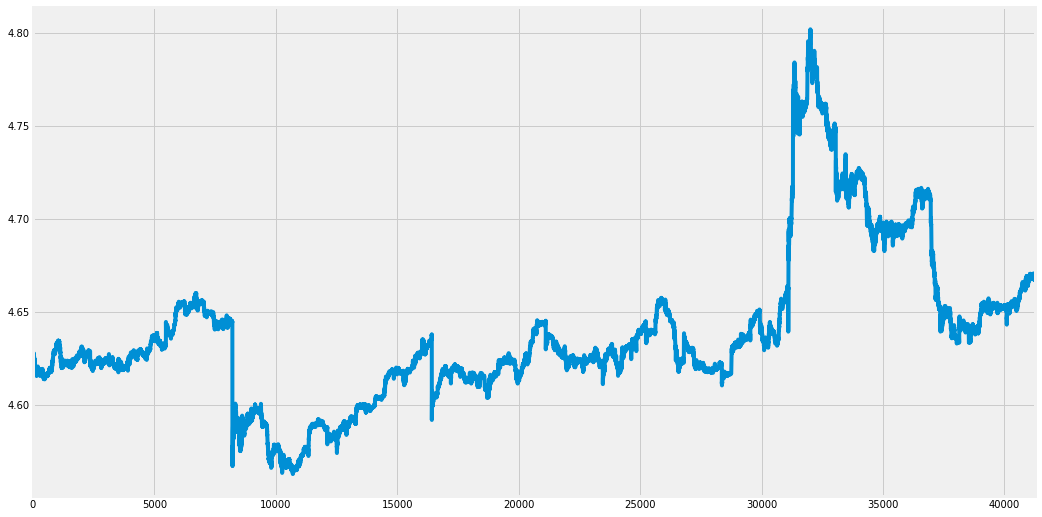

In [182]:
df2["ADP_LOG"].plot(figsize=(16,9))
plt.show()

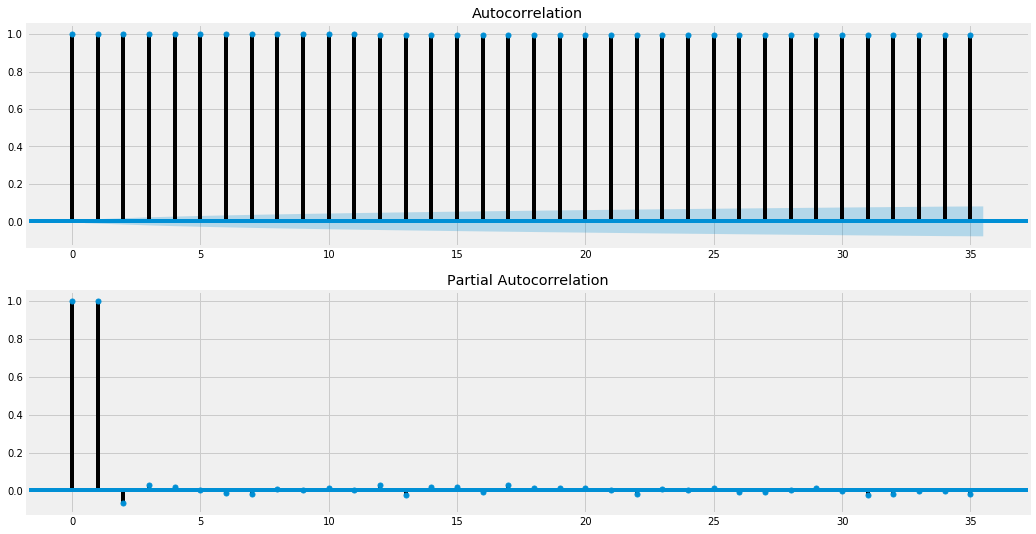

In [183]:
#Autocorrelation
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2["ADP_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2["ADP_LOG"], lags=35, ax=ax2)

In [184]:
#'ADP_LOG' column values to array and dropping NaN values
array2 = (df2["ADP_LOG"].dropna().as_matrix())

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [185]:
#creating ADP_LOG_DIFF
df2["ADP_LOG_DIFF"] = df2["ADP_LOG"] - df2["ADP_LOG"].shift(periods=-1)

In [186]:
#ARMA Model
model2 = sm.tsa.ARMA(array2,(2,0)).fit()
#Prints model parameter
print(model2.params)

[ 4.64047682  1.0596152  -0.05977929]


In [187]:
print(model2.aic, model2.bic, model2.hqic)

-482690.9495332401 -482656.43835645873 -482680.0417519335


In [188]:
aic=999999
a,b,c = 0,0,0

for p in range(3):
    for q in range(1,3):
        for r in range(3):
            try:
                model= ARIMA(array2,(p,q,r)).fit()
                if(aic > model2.aic):
                    aic = model2.aic
                    a,b,c = p,q,r
            except:
                pass 
            
print(a,b,c)

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


0 1 0


In [189]:
model2_arima = ARIMA(array2,(0, 1, 0)).fit()

In [190]:
print("Durbin-Watson statistic:",sm.stats.durbin_watson(model2_arima.resid))

Durbin-Watson statistic: 1.8805348562321806


In [191]:
pred2 = model2_arima.predict()
pred2

array([9.84773475e-07, 9.84773475e-07, 9.84773475e-07, ...,
       9.84773475e-07, 9.84773475e-07, 9.84773475e-07])

In [192]:
print("RMSE for Model-2=",np.sqrt(mean_squared_error(pred2,df2["ADP_LOG_DIFF"][:-1])))

RMSE for Model-2= 0.0006990223369080944


NASDAQ.CBOE

In [193]:
df3 = df.copy()

In [194]:
df3["CBOE_LOG"] = df3["NASDAQ.CBOE"].apply(lambda x:np.log(x))

In [195]:
df3.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,CBOE_LOG
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.394819
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.397038
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.397038
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.396053
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.395930


In [196]:
df3["DATE_NEW"] = df3["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

In [197]:
df3.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,CBOE_LOG,DATE_NEW
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.394819,2017-04-03 21:30:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.397038,2017-04-03 21:31:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.397038,2017-04-03 21:32:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.396053,2017-04-03 21:33:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.395930,2017-04-03 21:34:00


In [198]:
print("Durbin-Watson statistic:",sm.stats.durbin_watson(df3["CBOE_LOG"]))

Durbin-Watson statistic: 1.3696573056329881e-08


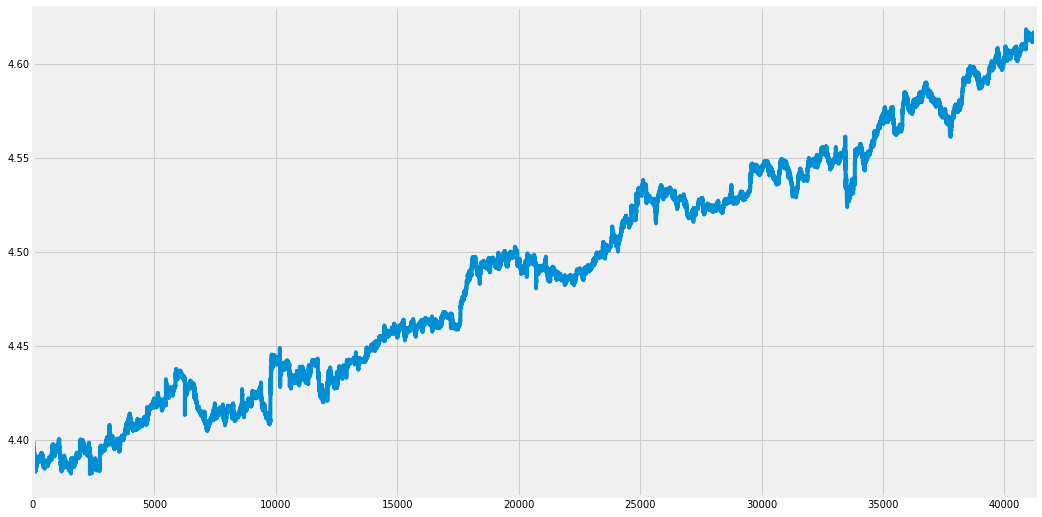

In [199]:
df3["CBOE_LOG"].plot(figsize=(16,9))
plt.show()

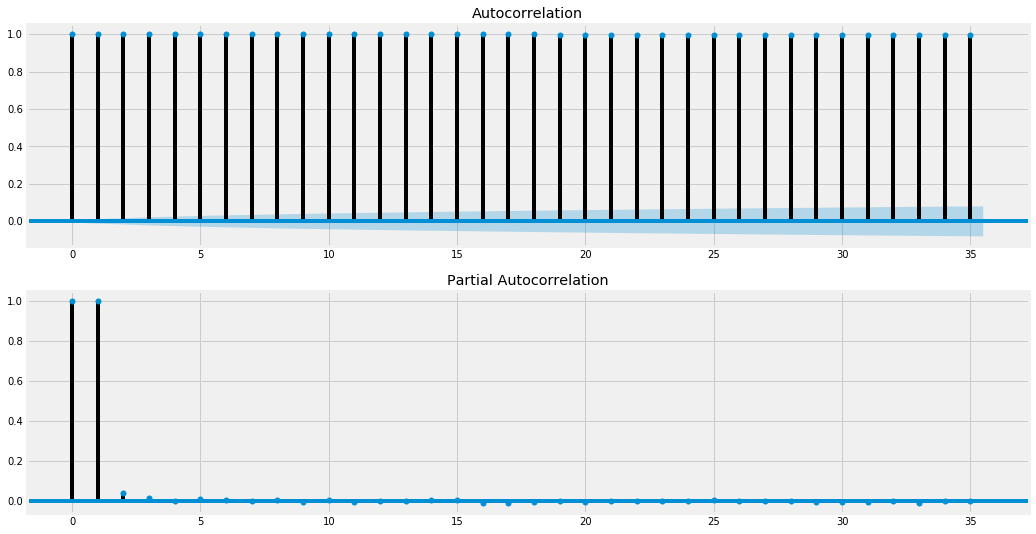

In [200]:
#Autocorrelation
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df3["CBOE_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df3["CBOE_LOG"], lags=35, ax=ax2)

In [201]:
array3 = (df3["CBOE_LOG"].dropna().as_matrix())

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [202]:
df3["CBOE_LOG_DIFF"] = df3["CBOE_LOG"] - df3["CBOE_LOG"].shift(periods=-1)

In [203]:
#ARMA Model
model3 = sm.tsa.ARMA(array3,(2,0)).fit()
#Prints model parameter
print(model3.params)

[4.50153036 0.92316365 0.07682276]


In [204]:
print(model3.aic, model3.bic, model3.hqic)

-506320.7421170915 -506286.2309403101 -506309.8343357849


In [205]:
aic=999999
a,b,c = 0,0,0

for p in range(3):
    for q in range(1,3):
        for r in range(3):
            try:
                model= ARIMA(array3,(p,q,r)).fit()
                if(aic > model3.aic):
                    aic = model3.aic
                    a,b,c = p,q,r
            except:
                pass 
            
print(a,b,c)

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 1 0


In [206]:
model3_arima = ARIMA(array3,(0, 1, 0)).fit()

In [207]:
print("Durbin-Watson statistic:",sm.stats.durbin_watson(model3_arima.resid))

Durbin-Watson statistic: 2.153351702869301


In [208]:
pred3 = model3_arima.predict()
pred3

array([5.31227062e-06, 5.31227062e-06, 5.31227062e-06, ...,
       5.31227062e-06, 5.31227062e-06, 5.31227062e-06])

In [209]:
print("RMSE for Model-3=",np.sqrt(mean_squared_error(pred3,df3["CBOE_LOG_DIFF"][:-1])))

RMSE for Model-3= 0.0005256421961878695


NASDAQ.CSCO

In [210]:
df4 = df.copy()

In [211]:
df4["CSCO_LOG"] = df4["NASDAQ.CSCO"].apply(lambda x:np.log(x))

In [212]:
df4.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,CSCO_LOG
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,3.518684
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,3.522825
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,3.523415
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,3.521936
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,3.521644


In [213]:
df4["DATE_NEW"] = df4["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

In [214]:
df4.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,CSCO_LOG,DATE_NEW
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,3.518684,2017-04-03 21:30:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,3.522825,2017-04-03 21:31:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,3.523415,2017-04-03 21:32:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,3.521936,2017-04-03 21:33:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,3.521644,2017-04-03 21:34:00


In [215]:
print("Durbin-Watson statistic:",sm.stats.durbin_watson(df4["CSCO_LOG"]))

Durbin-Watson statistic: 3.654769389312727e-08


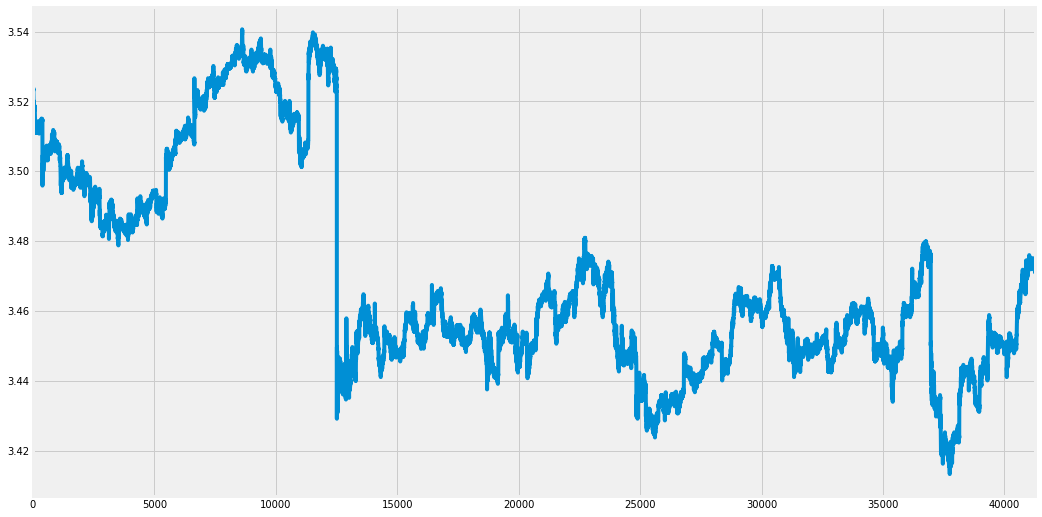

In [216]:
#series
df4["CSCO_LOG"].plot(figsize=(16,9))
plt.show()

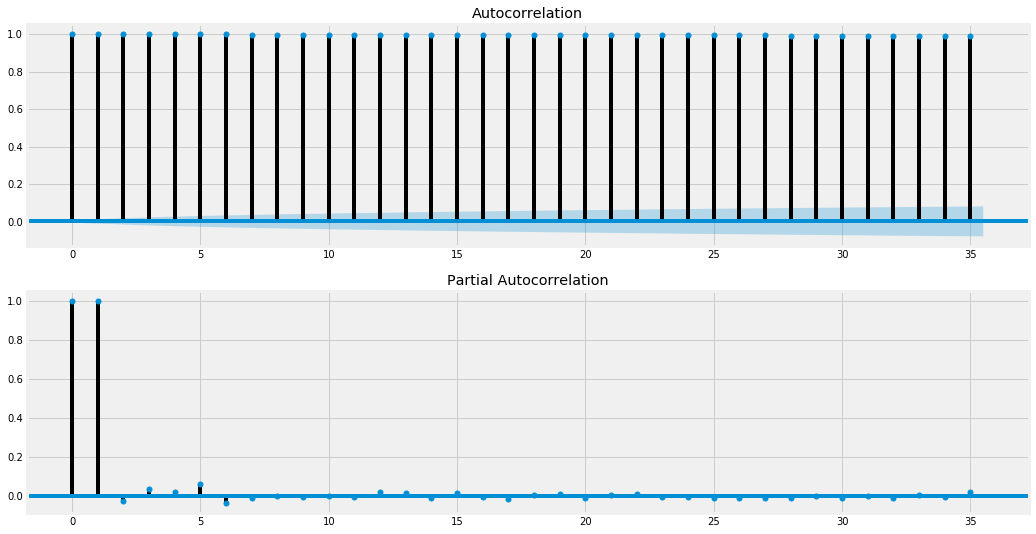

In [217]:
#Autocorrelation
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df4["CSCO_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df4["CSCO_LOG"], lags=35, ax=ax2)

In [218]:
array4 = (df4["CSCO_LOG"].dropna().as_matrix())
df4["CSCO_LOG_DIFF"] = df4["CSCO_LOG"] - df4["CSCO_LOG"].shift(periods=-1)
model4 = sm.tsa.ARMA(array4,(2,0)).fit()

#Prints model4 parameter
print(model4.params)
print(model4.aic, model4.bic, model4.hqic)

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


[ 3.47397555  1.01601783 -0.01625512]
-486880.2585560432 -486845.7473792618 -486869.3507747366


In [219]:
df4["CSCO_LOG_DIFF"] = df4["CSCO_LOG"] - df4["CSCO_LOG"].shift(periods=-1)

In [220]:
model4 = sm.tsa.ARMA(array4,(2,0)).fit()
#Prints model4 parameter
print(model4.params)

[ 3.47397555  1.01601783 -0.01625512]


In [221]:
print(model4.aic, model4.bic, model4.hqic)

-486880.2585560432 -486845.7473792618 -486869.3507747366


In [222]:
aic=999999
a,b,c = 0,0,0

for p in range(3):
    for q in range(1,3):
        for r in range(3):
            try:
                model= ARIMA(array4,(p,q,r)).fit()
                if(aic > model4.aic):
                    aic = model4.aic
                    a,b,c = p,q,r
            except:
                pass 
            
print(a,b,c)

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


0 1 0


In [223]:
model4_arima = ARIMA(array4,(0, 1, 0)).fit()

In [224]:
print("Durbin-Watson statistic:",sm.stats.durbin_watson(model4_arima.resid))

Durbin-Watson statistic: 1.9667794687094717


In [225]:
pred4 = model4_arima.predict()
pred4

array([-1.11336651e-06, -1.11336651e-06, -1.11336651e-06, ...,
       -1.11336651e-06, -1.11336651e-06, -1.11336651e-06])

In [226]:
print("RMSE for Model-4=",np.sqrt(mean_squared_error(pred4,df4["CSCO_LOG_DIFF"][:-1])))

RMSE for Model-4= 0.0006633386742358213


NASDAQ.EBAY

In [227]:
df5 = df.copy()

In [228]:
df5["EBAY_LOG"] = df5["NASDAQ.EBAY"].apply(lambda x:np.log(x))

In [229]:
df5.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,EBAY_LOG
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,3.508481
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,3.508406
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,3.508855
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,3.506608
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,3.508556


In [230]:
df5["DATE_NEW"] = df5["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

In [231]:
print("Durbin-Watson statistic:",sm.stats.durbin_watson(df5["EBAY_LOG"]))

Durbin-Watson statistic: 3.5208792726754005e-08


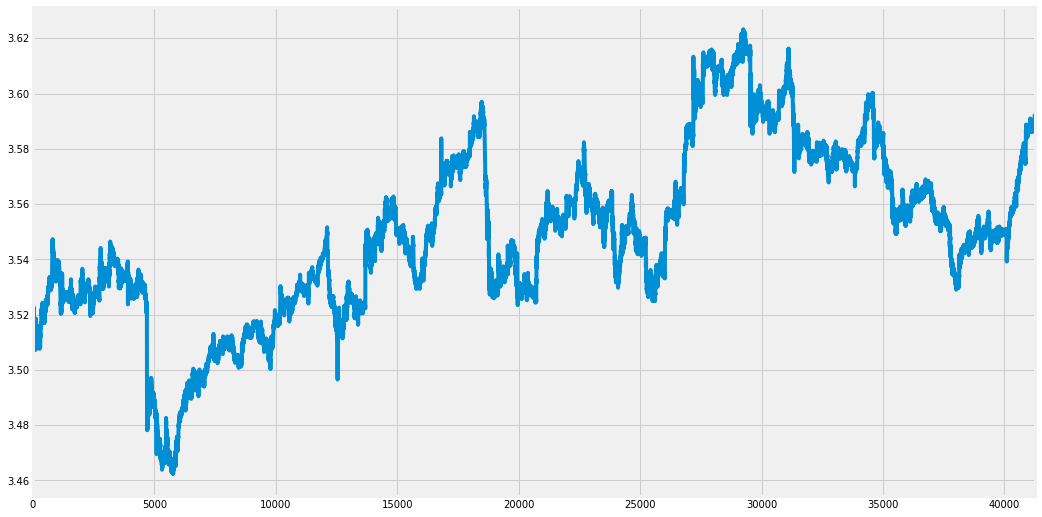

In [232]:
df5["EBAY_LOG"].plot(figsize=(16,9))
plt.show()

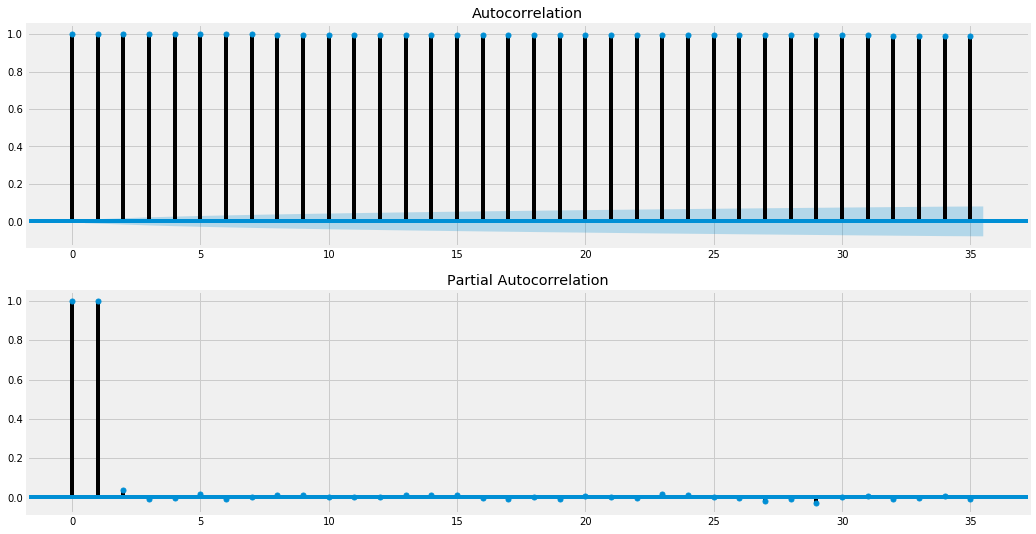

In [233]:
#Autocorrelation
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df5["EBAY_LOG"].values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df5["EBAY_LOG"], lags=35, ax=ax2)

In [234]:
array5 = (df5["EBAY_LOG"].dropna().as_matrix())

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [235]:
df5["EBAY_LOG_DIFF"] = df5["EBAY_LOG"] - df5["EBAY_LOG"].shift(periods=-1)

In [236]:
#ARMA Model
model5 = sm.tsa.ARMA(array5,(2,0)).fit()
#Prints model parameter
print(model5.params)

[3.54872752 0.95983152 0.03996799]


In [237]:
print(model5.aic, model5.bic, model5.hqic)

-486608.4996334379 -486573.9884566565 -486597.5918521313


In [238]:
aic=999999
a,b,c = 0,0,0

for p in range(3):
    for q in range(1,3):
        for r in range(3):
            try:
                model= ARIMA(array5,(p,q,r)).fit()
                if(aic > model5.aic):
                    aic = model5.aic
                    a,b,c = p,q,r
            except:
                pass 
            
print(a,b,c)

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\mode

0 1 0


C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [239]:
model5_arima = ARIMA(array5,(0, 1, 0)).fit()

In [240]:
print("Durbin-Watson statistic:",sm.stats.durbin_watson(model5_arima.resid))

Durbin-Watson statistic: 2.0801606898778675


In [241]:
pred5 = model5_arima.predict()
pred5

array([1.9057756e-06, 1.9057756e-06, 1.9057756e-06, ..., 1.9057756e-06,
       1.9057756e-06, 1.9057756e-06])

In [242]:
print("RMSE for Model-5=",np.sqrt(mean_squared_error(pred5,df5["EBAY_LOG_DIFF"][:-1])))

RMSE for Model-5= 0.0006659697472261442
